In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [237]:
df=pd.read_csv('market.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [238]:
df.shape

(200, 5)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [240]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [241]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [242]:
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [243]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

In [244]:
X= df.iloc[:, [2,4]].values

Text(0, 0.5, 'Count')

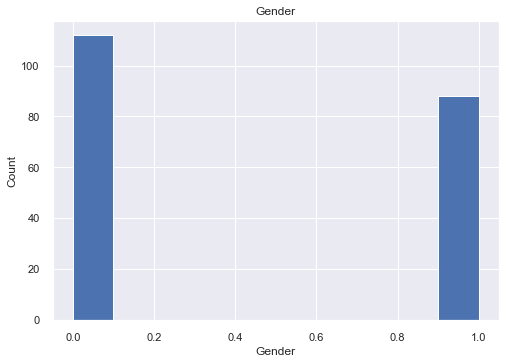

In [245]:
df.hist('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

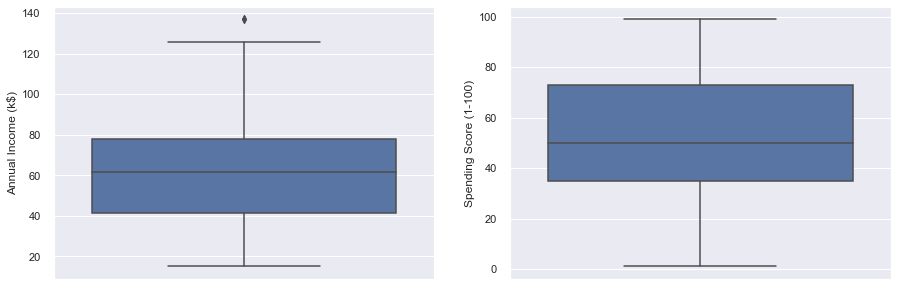

In [246]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df, y="Annual Income (k$)")

plt.subplot(1,2,2)
sns.boxplot(data=df, y="Spending Score (1-100)")

plt.show()

Text(0, 0.5, 'Count')

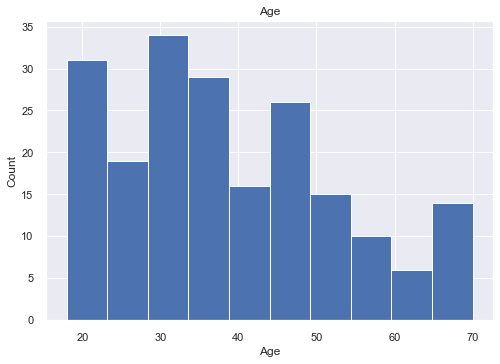

In [247]:
df.hist('Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

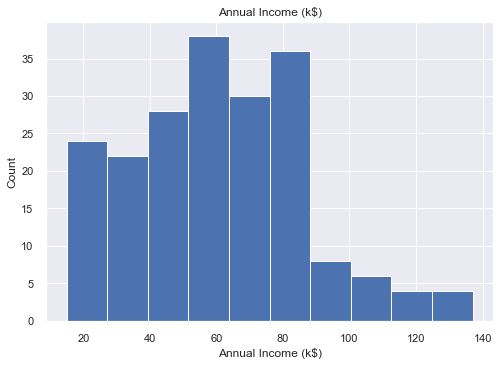

In [248]:
df.hist('Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

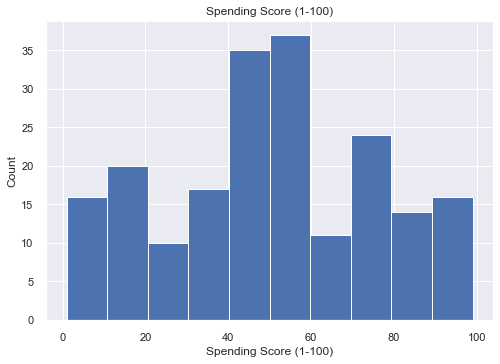

In [249]:
df.hist('Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')

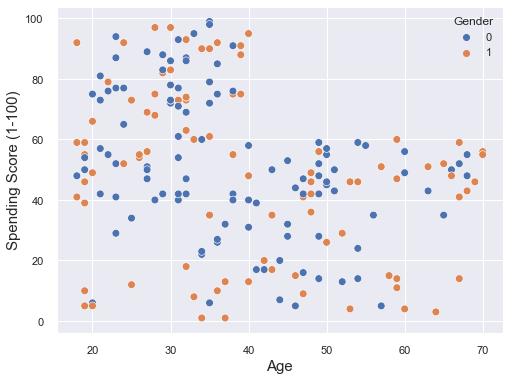

In [250]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')

sns.scatterplot(data=df, x="Age", y= "Spending Score (1-100)", hue="Gender", s=60)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Spending Score (1-100)", fontsize=15)
plt.show()

In [251]:
df_grouped = df.groupby('Gender')['Annual Income (k$)'].mean()

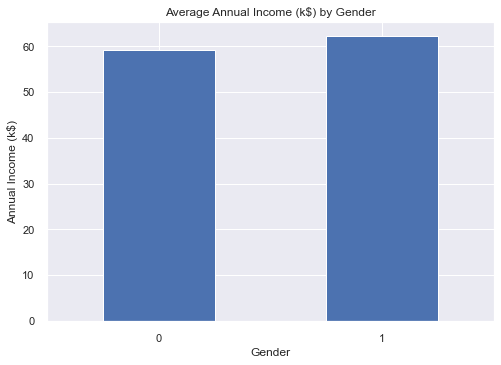

In [252]:
ax = df_grouped.plot(kind='bar', rot=0)

# set the title and axis labels
ax.set_title('Average Annual Income (k$) by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Annual Income (k$)')

plt.show()

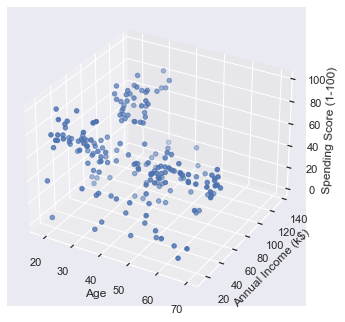

In [253]:
# Plot a 3D scatter plot of the of age,income and spending score
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'],df['Annual Income (k$)'], df['Spending Score (1-100)'])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_i

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(4, 12),
                 locate_elbow=False, metric='calinski_harabasz', timings=False)

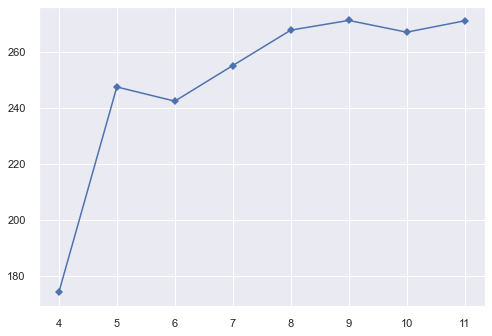

In [284]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False, locate_elbow=False
)

visualizer.fit(X)  

In [285]:
X= df[['Annual Income (k$)','Spending Score (1-100)']].values


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



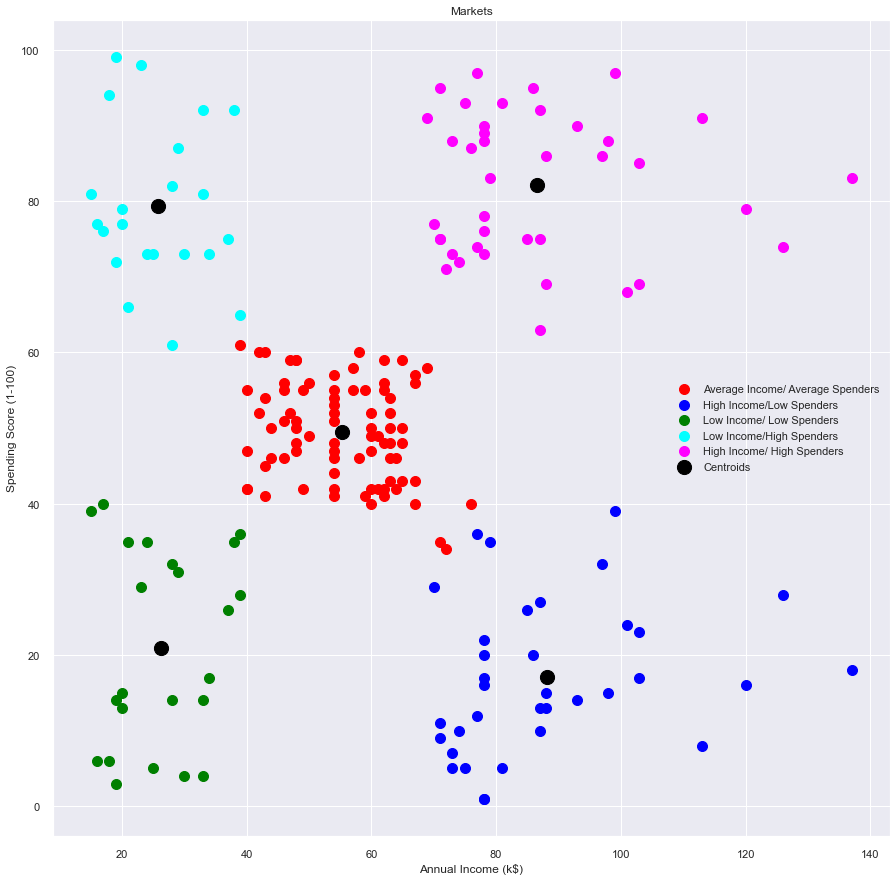

In [286]:
# Fit the k-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=5,random_state=42)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(15,15))
# Plot the data points with different colors for different clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Average Income/ Average Spenders')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'High Income/Low Spenders')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Income/ Low Spenders')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Low Income/High Spenders')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'High Income/ High Spenders')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Markets')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

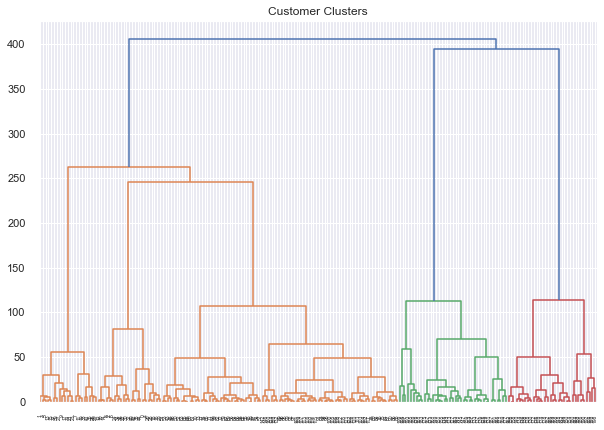

In [258]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 7))
plt.title("Customer Clusters")
cd = dendrogram(linkage(X, method='ward'))

In [290]:
X= df[['Age','Spending Score (1-100)']].values


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_i

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(3, 12),
                 locate_elbow=False, metric='calinski_harabasz', timings=False)

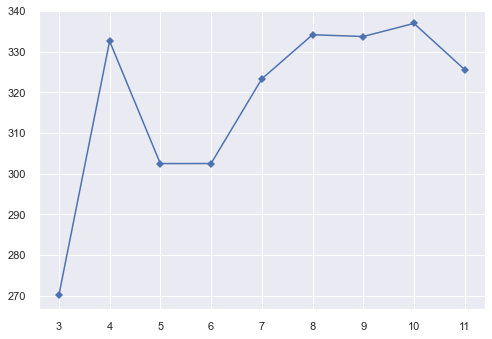

In [293]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(3,12), metric='calinski_harabasz', timings=False, locate_elbow=False
)

visualizer.fit(X)  

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



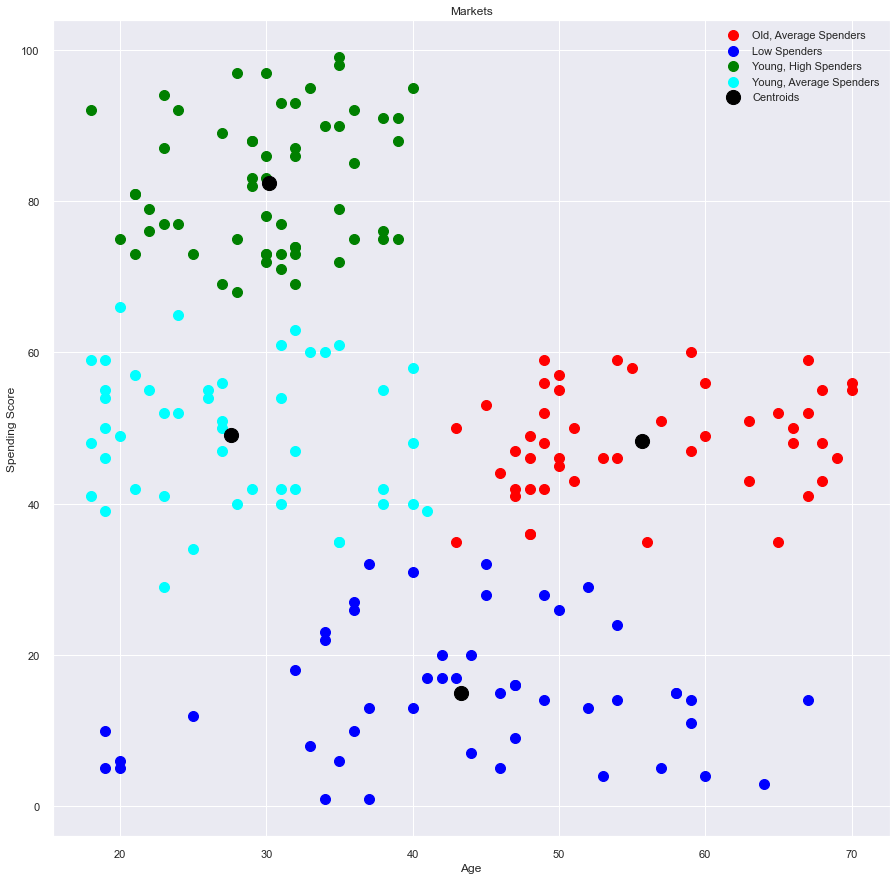

In [294]:
# Fit the k-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=4,random_state=42)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(15,15))
# Plot the data points with different colors for different clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Old, Average Spenders')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Low Spenders')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Young, High Spenders')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Young, Average Spenders')
# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Markets')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

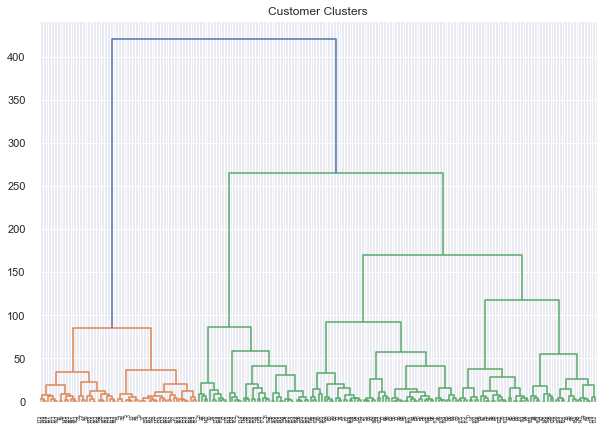

In [261]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 7))
plt.title("Customer Clusters")
cd = dendrogram(linkage(X, method='ward'))

In [295]:
X= df[['Age','Annual Income (k$)']].values

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=4), k=(2, 5),
                 locate_elbow=False, metric='calinski_harabasz', timings=False)

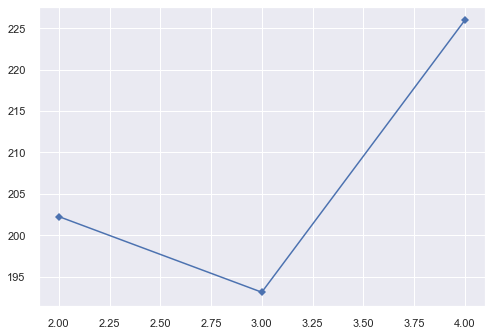

In [301]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,5), metric='calinski_harabasz', timings=False, locate_elbow=False
)

visualizer.fit(X)  

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



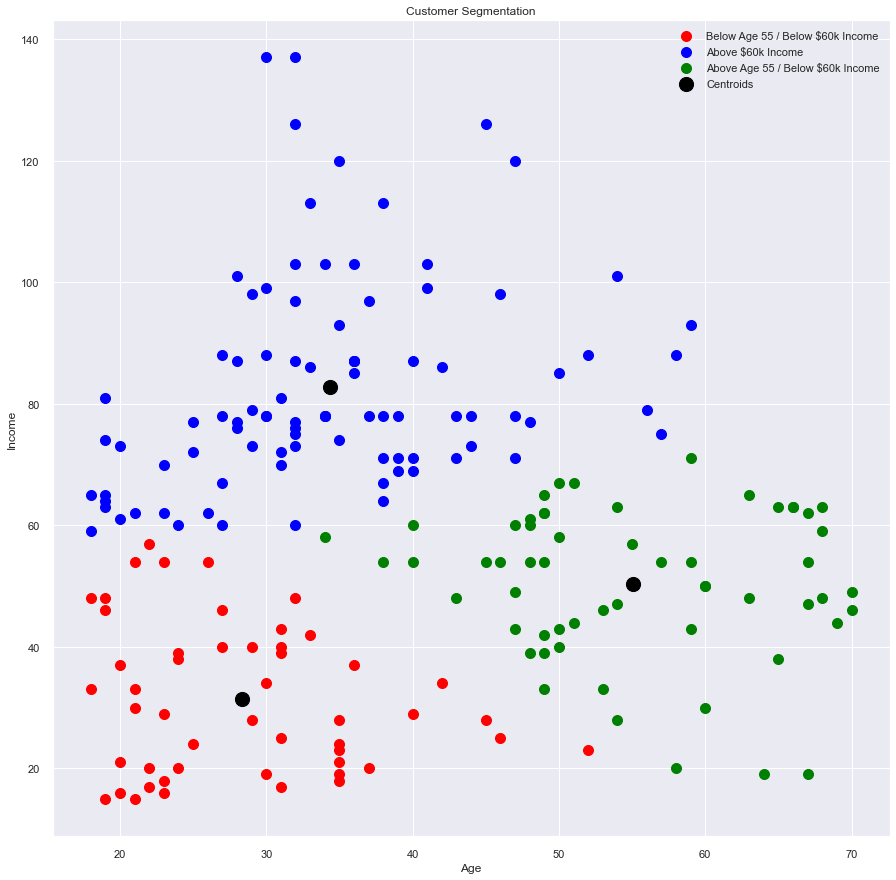

In [303]:
# Fit the k-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=3,random_state=42)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(15,15))
# Plot the data points with different colors for different clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Below Age 55 / Below $60k Income')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Above $60k Income')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Above Age 55 / Below $60k Income')
# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

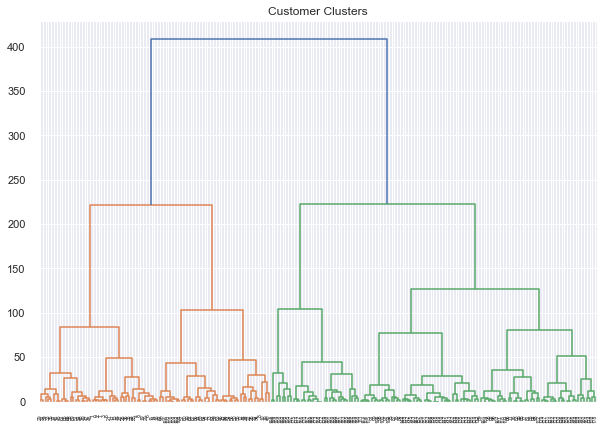

In [304]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 7))
plt.title("Customer Clusters")
cd = dendrogram(linkage(X, method='ward'))

In [305]:
# Create a sample dataframe with three components
df_new = df[['Annual Income (k$)', 'Spending Score (1-100)']]


# Perform PCA on three components (age, income, and Score)
pca = PCA(n_components=1)
pca.fit(df_new)
df_pca = pd.DataFrame(pca.fit_transform(df_new))


In [306]:
X= df[['Age','Annual Income (k$)','Spending Score (1-100)']].values

In [307]:
pca = PCA()
pca.fit(X)

pca.explained_variance_ratio_

array([0.45125272, 0.44098465, 0.10776263])

Text(0, 0.5, 'Cumulative Explained Variance')

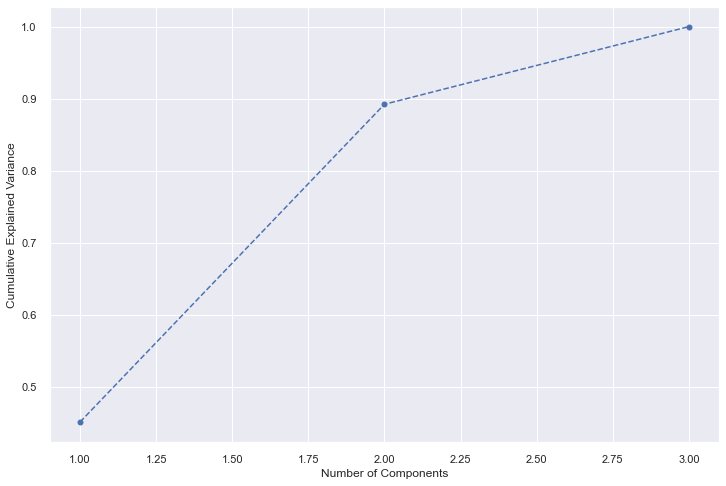

In [308]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 4), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [309]:
pca = PCA(n_components=2)
pca.fit(X)

df_pca_components = pd.DataFrame(
    data=pca.components_.round(2),
    columns=df[['Age','Annual Income (k$)','Spending Score (1-100)']].columns.values,
    index=['component 1', 'component 2'])

df_pca_components

,Age,Annual Income (k$),Spending Score (1-100)
component 1,-0.19,0.59,0.79
component 2,0.13,0.81,-0.57


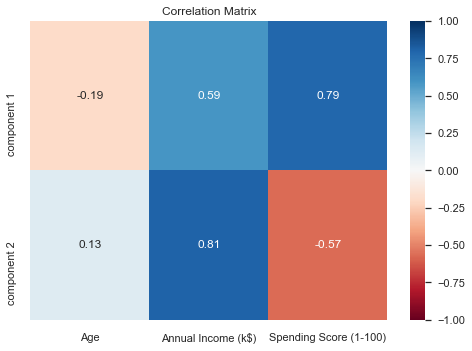

In [310]:
s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()

In [311]:
pca_scores = pca.transform(X)

results = {}

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_scores)   # pca_scores are standarzied by default
    results[i] = kmeans_pca.inertia_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_i

In [312]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=42)

In [313]:
df_segm_pca = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca.columns.values[-2:] = ['component 1', 'component 2']
df_segm_pca['K-means PCA'] = kmeans_pca.labels_

df_segm_pca

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),component 1,component 2,K-means PCA
0,1,1,19,15,39,-31.870508,-33.001425,2
1,2,1,21,15,81,0.763397,-56.843865,4
2,3,0,20,16,6,-57.408726,-13.122936,2
3,4,0,23,16,77,-2.169896,-53.477905,4
4,5,0,31,17,40,-32.174920,-30.387005,2
...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,58.353072,31.016926,1
196,197,0,45,126,28,19.909355,66.446425,3
197,198,1,32,126,74,58.521858,38.343853,1
198,199,1,32,137,18,20.981105,79.375146,3


In [314]:
df_segm_pca_analysis = df_segm_pca.groupby(['K-means PCA']).mean().round(4)
df_segm_pca_analysis

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),component 1,component 2
K-means PCA,,,,,,,
0,86.7927,0.4024,42.4756,55.4756,49.2683,-4.4103,-3.1005
1,162.0000,0.4615,32.6923,86.5385,82.1282,41.5511,1.8699
2,23.0000,0.3913,45.2174,26.3043,20.9130,-44.3870,-10.0493
3,165.5294,0.5588,41.6471,88.7353,16.7647,-10.2235,42.3315
4,23.0909,0.4091,25.2727,25.7273,79.3636,4.9843,-46.6735


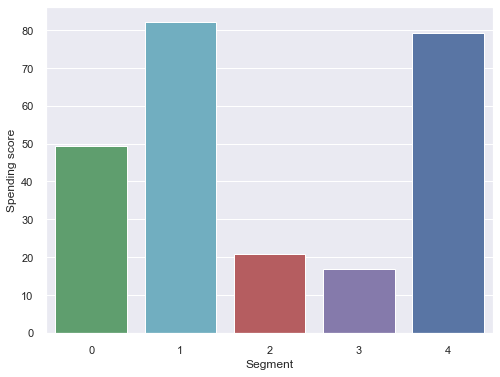

In [315]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_segm_pca_analysis, x=df_segm_pca_analysis.index, y='Spending Score (1-100)', palette=['g','c','r','m','b'])
plt.xlabel('Segment')
plt.ylabel('Spending score')
plt.show()


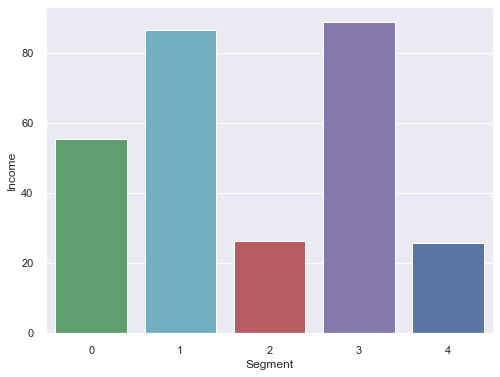

In [316]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_segm_pca_analysis, x=df_segm_pca_analysis.index, y='Annual Income (k$)', palette=['g','c','r','m','b'])
plt.xlabel('Segment')
plt.ylabel('Income')
plt.show()

In [317]:
df_segm_pca['Segment'] = df_segm_pca['K-means PCA'].map({
    0: 'Average Income/Spenders',
    1: 'High Income/Spenders',
    2: 'Low Income/Spenders',
    3: 'High Income/Low Spenders',
    4: 'Low Income/High Spenders'
})
df_segm_pca

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),component 1,component 2,K-means PCA,Segment
0,1,1,19,15,39,-31.870508,-33.001425,2,Low Income/Spenders
1,2,1,21,15,81,0.763397,-56.843865,4,Low Income/High Spenders
2,3,0,20,16,6,-57.408726,-13.122936,2,Low Income/Spenders
3,4,0,23,16,77,-2.169896,-53.477905,4,Low Income/High Spenders
4,5,0,31,17,40,-32.174920,-30.387005,2,Low Income/Spenders
...,...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,58.353072,31.016926,1,High Income/Spenders
196,197,0,45,126,28,19.909355,66.446425,3,High Income/Low Spenders
197,198,1,32,126,74,58.521858,38.343853,1,High Income/Spenders
198,199,1,32,137,18,20.981105,79.375146,3,High Income/Low Spenders


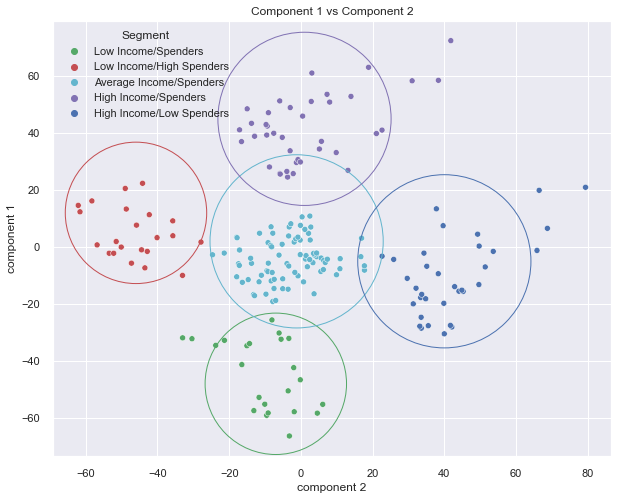

In [318]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 2'],
    y=df_segm_pca['component 1'],
    hue=df_segm_pca['Segment'],
    palette=['g','r','c','m','b']
)
plt.scatter(-7, -48 , s=20000, facecolors='none', edgecolors='g' )
plt.scatter(-1.2, 2 , s=30000, facecolors='none', edgecolors='c' )
plt.scatter(40, -5 , s=30000, facecolors='none', edgecolors='b' )
plt.scatter(-46, 12, s=20000, facecolors='none', edgecolors='r' )
plt.scatter(1, 45, s=30000, facecolors='none', edgecolors='m' )
plt.title('Component 1 vs Component 2')
plt.show()

In [320]:
import plotly.express as px

fig = px.scatter_3d(df_segm_pca, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='Segment',size_max=18)
fig.update_layout(margin=dict(l=6, r=6, b=6, t=6))
